<a href="https://colab.research.google.com/github/Luciebeaulieu/Data_science/blob/main/Lucie_Beaulieu_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [5]:
url = "https://docs.google.com/presentation/d/1HK4XdHCRMLHuMv1foQnA-X98jZFGAlSIx5hXSiolGZs/edit#slide=id.g1b25ac0824c_0_0" # go on the Google slides and delete the current pictures and change it into the two different images that I had which were day and night and then after making it shareable and switching it to anybody has access to it I copy and paste the new URL link into the old URL spot and my images upload into the cell

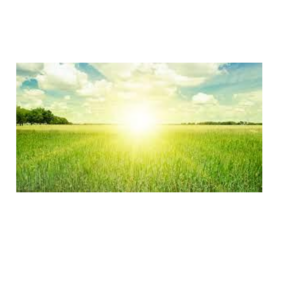

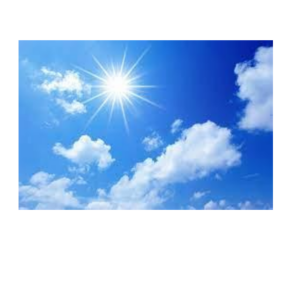

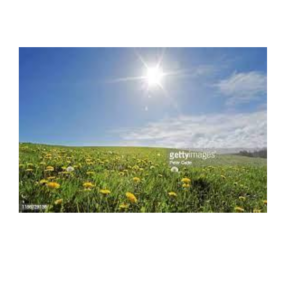

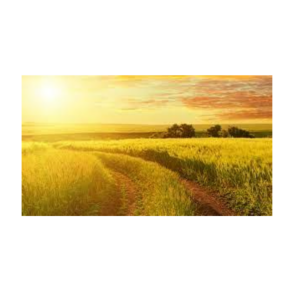

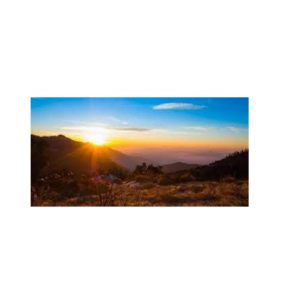

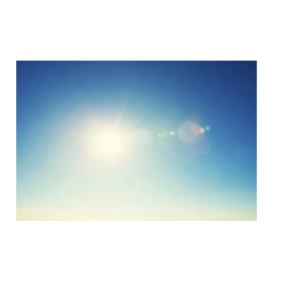

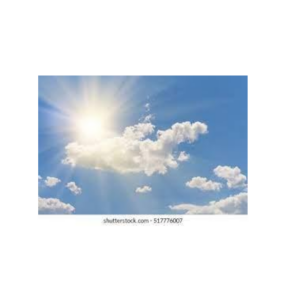

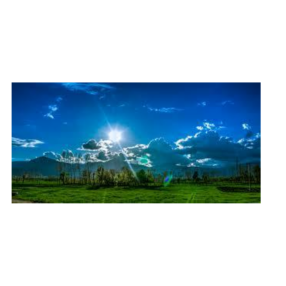

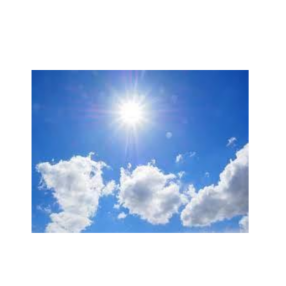

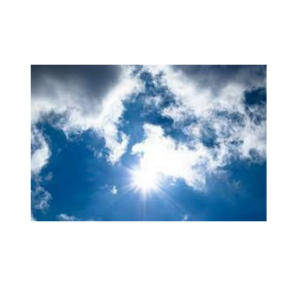

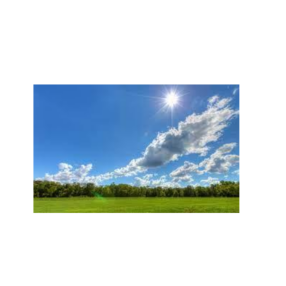

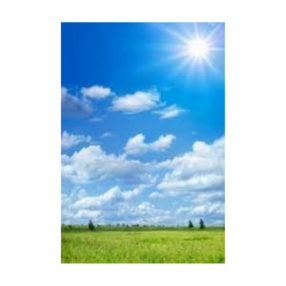

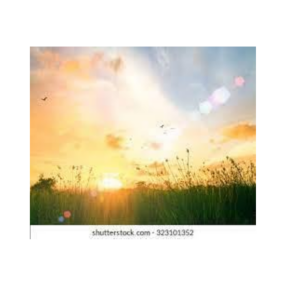

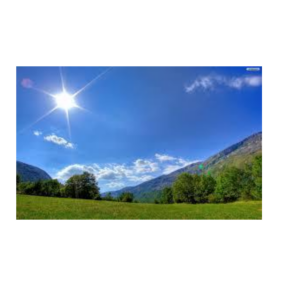

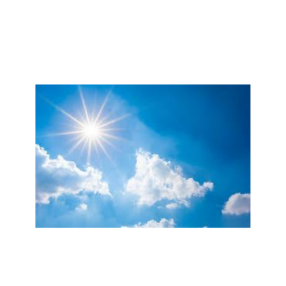

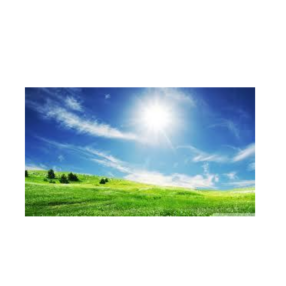

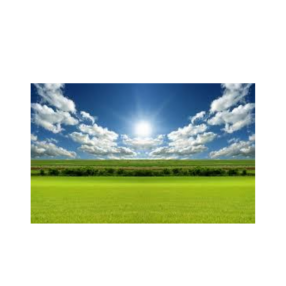

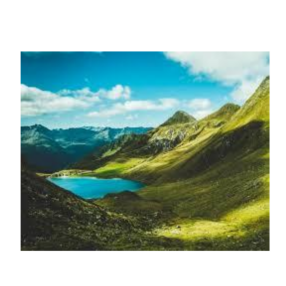

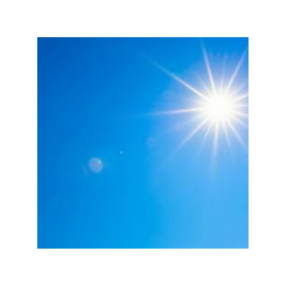

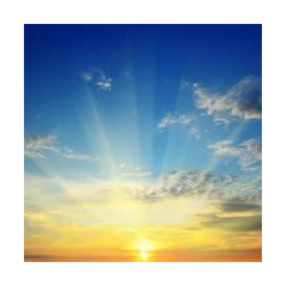

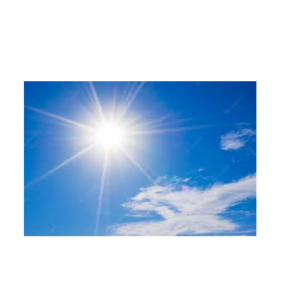

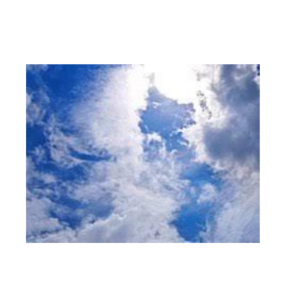

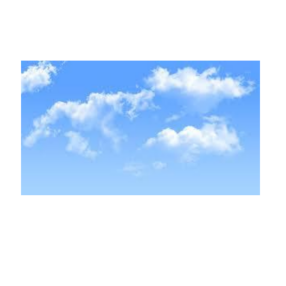

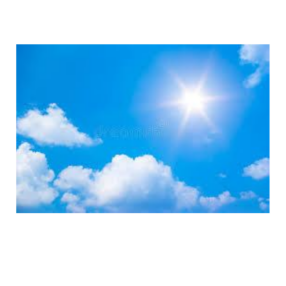

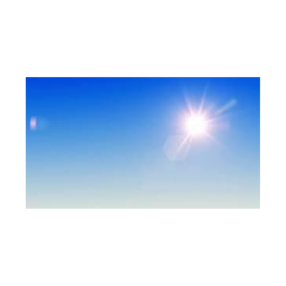

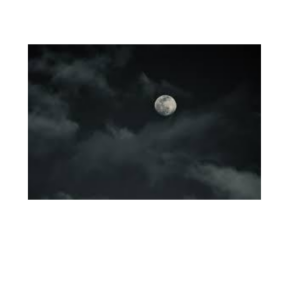

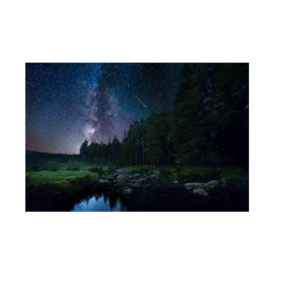

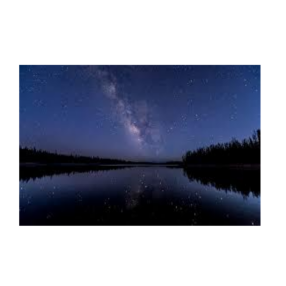

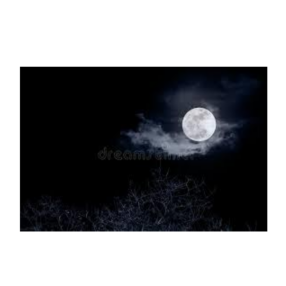

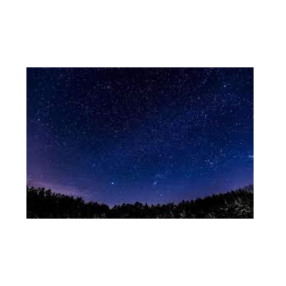

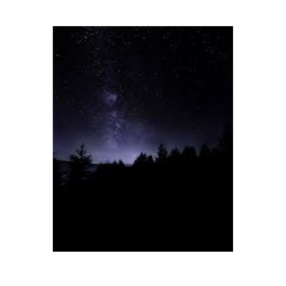

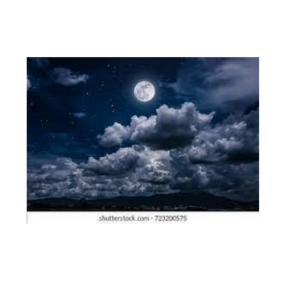

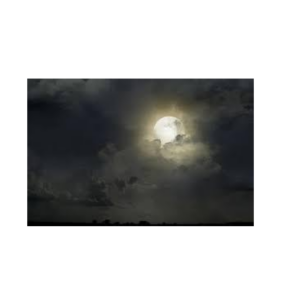

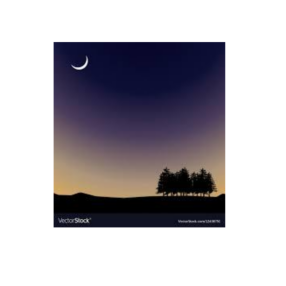

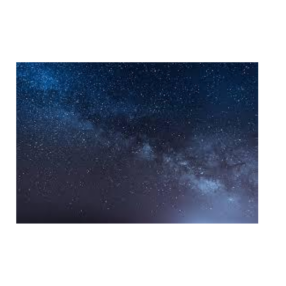

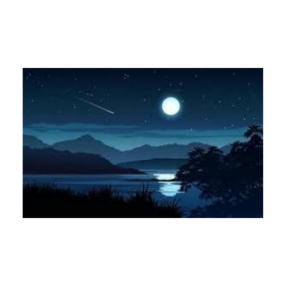

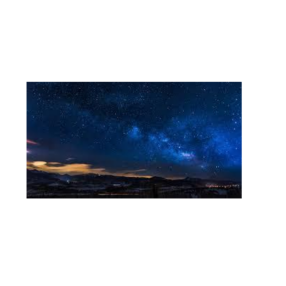

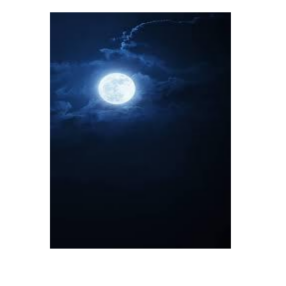

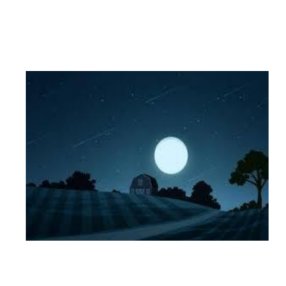

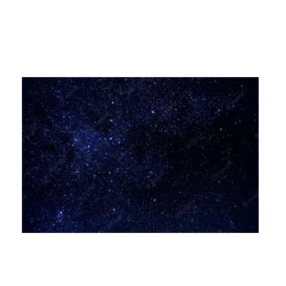

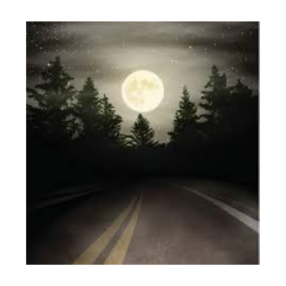

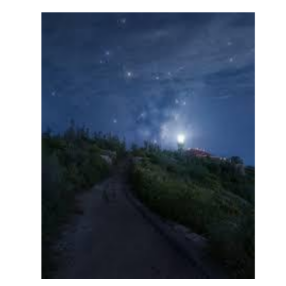

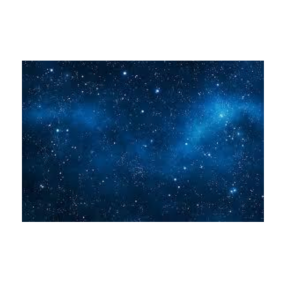

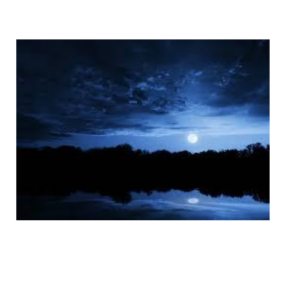

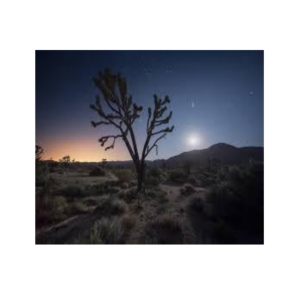

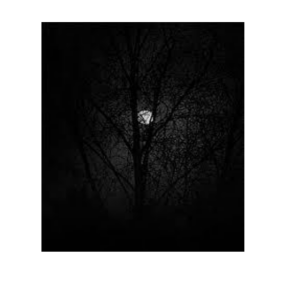

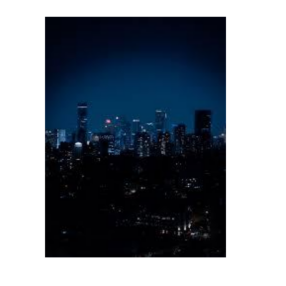

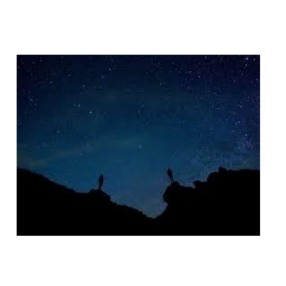

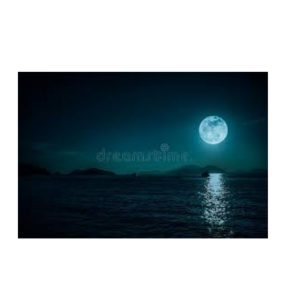

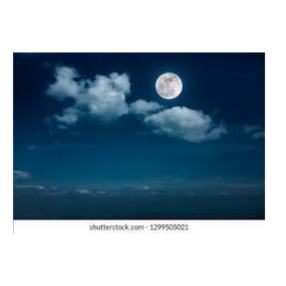

In [6]:
images = []

for image in get_slides(url):
  
    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [7]:
images.shape

torch.Size([50, 3, 224, 224])

In [8]:
model(images)

tensor([[ 3.2799,  0.1666, -3.8647,  ..., -3.2371,  3.2337,  2.1114],
        [-0.6489,  0.5699, -1.1092,  ..., -4.2105,  1.6123,  0.8820],
        [ 1.5388, -1.3122, -3.6781,  ..., -3.4152,  4.0260,  0.0830],
        ...,
        [ 0.0673, -0.9313,  1.2233,  ..., -3.3545,  0.6608,  1.9119],
        [ 1.1838,  0.9386,  2.4811,  ..., -4.4521, -0.3801,  2.8170],
        [-0.7427, -1.1524,  1.3291,  ..., -5.4659,  0.4282,  1.1278]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
y = model(images)

In [10]:
y.shape

torch.Size([50, 1000])

In [11]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [12]:
for i in list(guesses):
    print(labels[i])

web site, website, internet site, site
web site, website, internet site, site
sandbar, sand bar
rapeseed
ballpoint, ballpoint pen, ballpen, Biro
screen, CRT screen
web site, website, internet site, site
monitor
desktop computer
screen, CRT screen
monitor
web site, website, internet site, site
monitor
lakeside, lakeshore
web site, website, internet site, site
monitor
web site, website, internet site, site
valley, vale
screen, CRT screen
seashore, coast, seacoast, sea-coast
monitor
geyser
web site, website, internet site, site
monitor
seashore, coast, seacoast, sea-coast
cleaver, meat cleaver, chopper
screen, CRT screen
screen, CRT screen
cleaver, meat cleaver, chopper
cleaver, meat cleaver, chopper
screen, CRT screen
screen, CRT screen
screen, CRT screen
desktop computer
cleaver, meat cleaver, chopper
screen, CRT screen
television, television system
dishwasher, dish washer, dishwashing machine
notebook, notebook computer
cleaver, meat cleaver, chopper
golf ball
television, television sy

In [13]:
Y = np.zeros(50,)
Y[25:] = 1

In [14]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
X = y.detach().cpu().numpy() 

In [16]:
X.shape

(50, 1000)

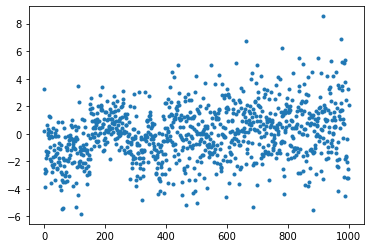

In [17]:
plt.plot(X[0],'.')

In [18]:
X[0]

array([ 3.27985764e+00,  1.66589826e-01, -3.86474442e+00, -2.55792570e+00,
       -2.85794926e+00, -2.68191528e+00, -1.76765931e+00, -1.27863181e+00,
       -1.35273182e+00,  6.05771303e-01, -1.56925201e+00,  6.61055446e-02,
       -1.28954291e+00, -7.52492249e-02,  3.27327520e-01,  1.30364704e+00,
       -2.77833998e-01,  1.76029533e-01,  1.25460148e+00, -9.92127657e-01,
       -1.80781460e+00,  1.64537460e-01, -1.76775813e-01, -1.99323666e+00,
       -3.57671738e+00, -2.24566936e+00, -2.73862696e+00, -2.64584005e-01,
       -2.43034863e+00,  4.46247876e-01, -1.69327855e+00, -8.34203362e-01,
       -2.21437216e+00, -1.18417645e+00, -1.72411472e-01, -1.60013604e+00,
        5.96166849e-02, -3.32665706e+00,  2.63581038e-01, -1.95369825e-01,
       -1.50240672e+00, -2.48816586e+00, -2.54164267e+00, -1.41862953e+00,
       -1.03597212e+00, -2.02796459e+00, -1.58752024e-01,  8.72405410e-01,
       -1.72946846e+00, -2.06966209e+00, -6.99663758e-01, -1.13523412e+00,
       -2.23507643e+00, -

In [19]:
np.argmax(X[0])

916

In [20]:
labels[948]

'Granny Smith'

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [22]:
for i in top_ten:
    print(labels[i])

web site, website, internet site, site
lakeside, lakeshore
monitor
screen, CRT screen
sunscreen, sunblock, sun blocker
water bottle
corn
cucumber, cuke
seashore, coast, seacoast, sea-coast
lotion


In [23]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 13.,  54., 142., 271., 290., 155.,  52.,  19.,   3.,   1.]),
 array([-5.8137884 , -4.379484  , -2.94518   , -1.5108757 , -0.07657146,
         1.3577328 ,  2.792037  ,  4.2263412 ,  5.6606455 ,  7.0949497 ,
         8.529254  ], dtype=float32),
 <a list of 10 Patch objects>)

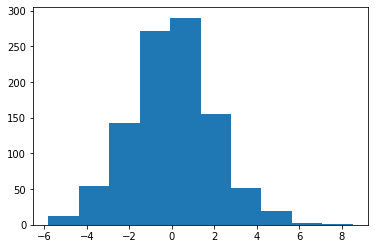

In [24]:
plt.hist(X[0])

In [25]:
X = GPU_data(X)
Y = GPU_data(Y)

In [26]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [27]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [28]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [29]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [30]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [31]:
X.shape

torch.Size([50, 1000])

In [32]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [33]:
def model(x,w):

    return x@w[0]

In [34]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [36]:
wb.init(project="Linear_Model_Photo_1"); # when the link to the graphs load in you can see two different types of graphs with different numbers on itlink to the graphs load in you can see two different types of graphs with different numbers on it 
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots() # when looking at the line chart after running it a few times my highest number is seem to be .995 and loses is .32


acc_train,▃▆▁▆▅▇▇▇█▇██████████████████████████████
loss,▆▃█▃▄▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc_train,0.96875
loss,0.34451


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/